## Project deliverables 

1. Business understanding 
2. Data understanding 
3. Data preparation
4. Modeling 
5. Model quality
6. Validating
7. Conclusions and recommendations 


## 1. BUSINESS UNDERSTANDING 

With the data we are provided with, we are supposed to give clear and concise predictions of arrests so that we can be able to prevent the occurences of being falsely arrested and also being able to identify which race, gender and what crimes are committed when one is stopped 

We want to build a classifier to predict whether an arrest happens after a Terry Stop. We're interested in using data like the presence of weapons, time of day, and even potentially sensitive information like race and gender. This could be a powerful tool for understanding the factors that influence police decisions, but it's important to handle sensitive data responsibly and be transparent about how you use it. We're curious if there's a correlation between race (of officer or subject) and the likelihood of an arrest. This is a complex and sensitive topic, and it's important to approach it with careful consideration and ethical awareness.

### 1.1 Business Objectives 
1. **Improve Transparency and Accountability:**
*Goal:* To provide a clearer understanding of the factors that influence police decisions during Terry Stops, promoting greater transparency and accountability in law enforcement.
*Outcome:* The model's insights can be used to identify potential biases and areas for improvement in police practices.

2. **Reduce Unnecessary Arrests:**
*Goal:* To develop a model that can help predict the likelihood of an arrest based on objective factors, reducing the number of unnecessary arrests and promoting fairer treatment.
*Outcome:* The model can be used to inform police officers' decisions during Terry Stops, potentially leading to fewer arrests based on subjective biases.

3. **Inform Policy and Training:**
*Goal:* To provide data-driven insights that can inform policy decisions and training programs aimed at reducing bias in law enforcement.
*Outcome:* The model's findings can be used to develop training materials that address potential biases and promote more equitable policing practices.

### 1.2 Project Objectives 
1. **Develop a Predictive Model:**
Goal: To build a robust machine learning model that can accurately predict the likelihood of an arrest after a Terry Stop based on relevant factors.
Outcome: A model that can reliably identify high-risk situations where an arrest is more likely, but also highlight potential biases in decision-making.

2. **Analyze Factors Influencing Arrest Decisions:**
Goal: To identify and quantify the influence of various factors (e.g., presence of weapons, time of day, race, gender) on the likelihood of an arrest.
Outcome: A detailed understanding of the factors that contribute to arrest decisions, allowing for targeted interventions to address potential biases.

3. **Ensure Responsible and Ethical Use of Data:**
Goal: To implement strong ethical safeguards in data collection, model development, and model deployment to prevent misuse and ensure fairness.
Outcome: A model that is transparent, accountable, and used responsibly to promote fairness and equity in law enforcement.

# 2. DATA UNDERSTANDING 


## 2.1 Column Description

1. Subject Age group: Subject age group (10 year increments) as reported 
2. Subject ID: Key, generated daily, identifying unique subjects in the dataset using a character to character match of first name and last name
3. GO/SC Num: General Offense or Street Check number, relating the Terry Stop to the parent report
4. Terry stop ID: Key identifying unique Terry Stop reports.
5. Stop resolution: Resolution of the stop as reported by the officer 
6. Weapon type: Type of weapon, if any, identified during a search or frisk of the subject.
7. Officer ID: Key identifying unique officers in the dataset.
8. Officer YOB: Year of birth, as reported by the officer.
9. Officer Gender: Gender of the officer 
10. Officer Race: Race of the officer 
11. Subject perceived Race: percieved race of the subject as reported 
12. Subject Percieved Gender: Percieved gender of the subject as reported 
13. Reported date: Date the report was filled in the Records Management System (RMS)
14. Reported Time: Time the stop was reported in the RMS
15. Initial Call Type: Initial classification of the call as assigned by 911
16. Final Call type: Final classification of the call as assigned by the primary officer closing the event 
17. Call Type: How the call was received by the communications center
18. Officer Squad: Funstional squad Assignment(not budget) of the officer as reported by the Data Analytics Platform
19. Arrest Flag: Indicator of whether a "physical arrest was made, of the subject, during the Terry Stop
20. Frisk Flag: Indicator of whether a "frisk" was conducted, by the officer, of the subject, during the stop
21. Precinct: Precinct of the address associated with the underlying Computer Aided Dispatch (CAD)
22. Sector: Sector of the address associated with underlying CAD event
23. Beat: Beat of the address associated with the underlying CAD event

In [636]:
#Import the necessary libraries 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier




#Read the CSV file 
df = pd.read_csv("Terry_Stops_20241221.csv")

df


,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,7730668589,20200000269262,15598261436,Arrest,-,6920,1970,M,White,...,12:12:13.0000000,BURG - OCCUPIED RESD,"--BURGLARY - RESIDENTIAL, UNOCCUPIED",911,NORTH PCT 1ST W - UNION - PLATOON 1,Y,N,North,U,U3
1,26 - 35,26001979426,20220000127661,33929714887,Arrest,-,8350,1989,M,White,...,03:27:53.0000000,WARRANT - FELONY PICKUP,--WARRANT SERVICES - FELONY,ONVIEW,SOUTHWEST PCT 3RD W - WILLIAM - PLATOON 2,Y,N,Southwest,W,W2
2,46 - 55,7750023956,20220000294318,37992469096,Arrest,-,8899,1993,M,Two or More Races,...,21:15:00.0000000,ORDER - VIOLATION OF COURT ORDER (NON DV),--DISTURBANCE - OTHER,911,TRAINING - FIELD TRAINING SQUAD,Y,Y,North,J,J2
3,26 - 35,-1,20160000282454,180845,Arrest,NaN,7638,1989,M,White,...,00:13:00.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--DV - ENFORCE COURT ORDER (ARREST MANDATED),"TELEPHONE OTHER, NOT 911",WEST PCT 3RD W - DAVID - PLATOON 1,N,N,West,D,D2
4,26 - 35,-1,20170000392209,346970,Arrest,NaN,7576,1980,M,White,...,13:11:00.0000000,ROBBERY - CRITICAL (INCLUDES STRONG ARM),--ROBBERY - STRONG ARM,911,WEST PCT 1ST W - DAVID - PLATOON 1,N,N,West,M,M3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62195,36 - 45,-1,20150000161499,44071,Referred for Prosecution,NaN,7402,1973,M,White,...,03:27:00.0000000,DISTURBANCE,--TRAFFIC - D.U.I.,911,EAST PCT 3RD W - EDWARD,N,N,East,C,C2
62196,46 - 55,-1,20190000060929,533278,Referred for Prosecution,NaN,7682,1987,M,White,...,06:53:00.0000000,THEFT (DOES NOT INCLUDE SHOPLIFT OR SVCS),--THEFT - ALL OTHER,911,SOUTH PCT 1ST W - R/S RELIEF,N,N,South,R,R3
62197,26 - 35,-1,20180000259432,441903,Referred for Prosecution,NaN,8394,1991,M,White,...,23:11:00.0000000,SHOPLIFT - THEFT,--THEFT - SHOPLIFT,911,NORTH PCT 3RD W - UNION - PLATOON 1,N,N,North,U,U3
62198,18 - 25,-1,20180000251356,440047,Referred for Prosecution,NaN,6613,1971,M,Declined to Answer,...,06:02:00.0000000,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--NARCOTICS - OTHER,ONVIEW,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,N,East,G,G2


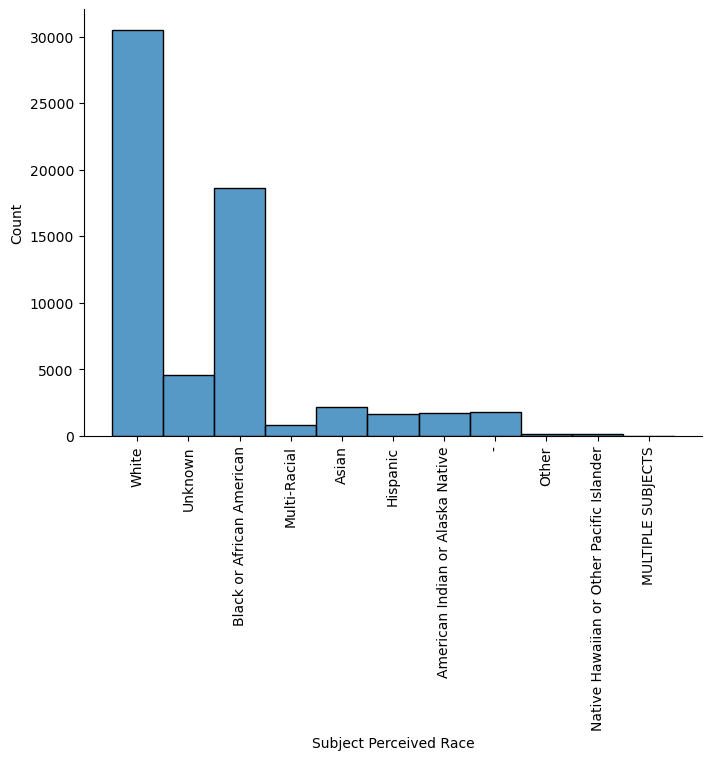

In [602]:
sns.displot(x=df["Subject Perceived Race"], height=5, aspect=1.5) 
plt.xticks(rotation=90)  
plt.show()




##### conclusions on the graph

* The highest race of subjects perceived are whites followed by the black or african american
* The least frequent races are Native Hawaiian or Other Pacific Islander and Multiple Subjects.

## 2.2 Selecting the columns to be used 

* By further filtering your data to only the columns that you need will help you have better understanding of what you are working with
* You select these columns by understanding the objectives you want to accomplish and see what sort of columns works best for you

In [603]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

In [604]:
# Handle NaN values
selc_columns = df.replace('-', pd.NA).dropna()

selc_columns.shape

(3192, 23)

In [605]:
data_columns = selc_columns.drop(columns=['Subject ID', 'GO / SC Num', 'Terry Stop ID', 'Weapon Type', 'Officer ID', 'Officer YOB', 'Reported Date', 'Reported Time', 'Initial Call Type', 'Call Type', 'Officer Squad', 
       'Sector', 'Beat'])
data_columns.head()

,Subject Age Group,Stop Resolution,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Final Call Type,Arrest Flag,Frisk Flag,Precinct
9,18 - 25,Arrest,M,White,White,Male,"--ASSAULTS - HARASSMENT, THREATS",N,Y,North
25,26 - 35,Arrest,M,White,White,Male,"--WEAPON,PERSON WITH - OTHER WEAPON",N,Y,Southwest
30,36 - 45,Arrest,M,White,White,Male,--NARCOTICS - OTHER,N,N,West
50,26 - 35,Arrest,M,White,White,Male,--AUTOMOBILES - RECOVERY (THEFT),Y,Y,West
85,26 - 35,Arrest,M,White,Hispanic,Male,--NARCOTICS - OTHER,N,Y,South


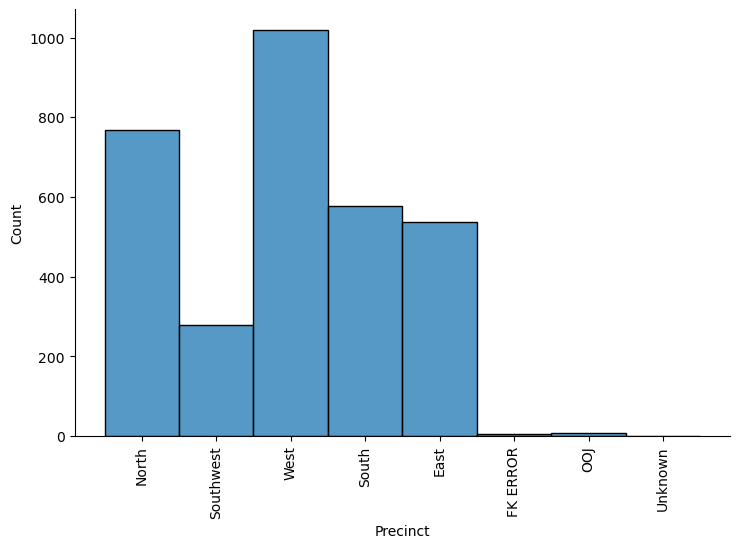

In [606]:
sns.displot(x=data_columns["Precinct"], height=5, aspect=1.5) 
plt.xticks(rotation=90)  
plt.show()

##### Conclusions drawn

The provided image shows a histogram depicting the distribution of data across different precincts. Some conclusions that can be drawn are:

* **West precinct has the highest count:**  The West precinct has the tallest bar, indicating it has the highest number of occurrences, exceeding 1000.
* **South and East precincts have similar counts:** The bars for North and East precincts appear to have similar heights, suggesting a comparable number of occurrences, both falling between 500 and 600.
* **Limited data for FK ERROR, OOJ, Unknown:** The bars for FK ERROR, OOJ, and Unknown are very small, indicating very few occurrences fall under these categories.
* **Data is skewed:** The data is not evenly distributed across precincts, with a clear skew towards the West precinct followed by the North precinct. This suggests that the terry stops is likely concentrated or more prevalent in the West and North precinct compared to others. 


## 3 DATA PREPARATION 

### 3.1 Performing a Train-Test split 

We do this so that we can be able to evaluate the model

With this particular line of code we get the appropriate value counts for contents present in the various columns displayed in the data_columns  

In [607]:
categoricals = data_columns

for col in categoricals:
    print(data_columns[col].value_counts(), "\n")

Subject Age Group
26 - 35         1102
36 - 45          838
18 - 25          567
46 - 55          415
56 and Above     192
1 - 17            78
Name: count, dtype: int64 

Stop Resolution
Arrest                      1553
Field Contact                816
Offense Report               763
Referred for Prosecution      57
Citation / Infraction          3
Name: count, dtype: int64 

Officer Gender
M    2867
F     325
Name: count, dtype: int64 

Officer Race
White                                        2232
Two or More Races                             273
Hispanic                                      221
Asian                                         157
Black or African American                     137
Declined to Answer                            132
Native Hawaiian or Other Pacific Islander      30
American Indian or Alaska Native               10
Name: count, dtype: int64 

Subject Perceived Race
White                                        1667
Black or African American                 

In [608]:
data_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3192 entries, 9 to 62176
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         3192 non-null   object
 1   Stop Resolution           3192 non-null   object
 2   Officer Gender            3192 non-null   object
 3   Officer Race              3192 non-null   object
 4   Subject Perceived Race    3192 non-null   object
 5   Subject Perceived Gender  3192 non-null   object
 6   Final Call Type           3192 non-null   object
 7   Arrest Flag               3192 non-null   object
 8   Frisk Flag                3192 non-null   object
 9   Precinct                  3192 non-null   object
dtypes: object(10)
memory usage: 274.3+ KB


In [609]:
# Select only columns needed for this particular step
new_data_columns = data_columns.drop(columns=['Officer Race', 'Officer Gender','Subject Age Group'])

new_data_columns.shape

(3192, 7)

* **Focus on Specific Variables:** The code is clearly interested in analyzing the relationships between variables like "Stop Resolution," "Subject Perceived Race," "Subject Perceived Gender," etc., without considering the officers' race or gender, and the subject's age group.

* **Potential Analysis:** This data preparation suggests a potential analysis focusing on how these variables relate to each other. For example, we want to investigate if certain subject perceived races or genders are more likely to be stopped, frisked, or arrested, independent of the officer's characteristics.






In [610]:
X = new_data_columns.drop('Arrest Flag', axis=1)
y = new_data_columns['Arrest Flag']

X.shape

(3192, 6)

* The code that follows splits our data using the train-test split

* Then checking the shape and seeing if it correlates with whatever we have and is correct

In [611]:

# Perform train-test split.                
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

null_counts = X_train.isnull().sum()

print(null_counts)


Stop Resolution             0
Subject Perceived Race      0
Subject Perceived Gender    0
Final Call Type             0
Frisk Flag                  0
Precinct                    0
dtype: int64


The result shown above indicates that there aren't any null values in the data since they were dropped initially

#### 3.2 One hot encoding the necessary columns 

We one hot encode in order to change the necessary columns with values as strings into integers so that we can be able to do our model fitting 

In [612]:
one_hot_encoded_df = pd.get_dummies(X_train, columns=[ 'Stop Resolution', 'Subject Perceived Gender', 'Subject Perceived Race', 'Final Call Type', 'Frisk Flag', 'Precinct'], dtype = int)

one_hot_encoded_df.shape

(2394, 111)

#### 3.3 Fitting our model

This is necessary because it is to best capture the underlying patterns in the training data and with this we can accurately predict based on the input data

In [613]:


# Instantiate the logistic regression model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
model_log = logreg.fit(one_hot_encoded_df, y_train)

model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

#### 4.0 Evaluating our model

By using the Area Under the Curve we are able to plot the Receiver Operating Characteristics

In [614]:
print("Training features:", X_train.columns)
print("Testing features:", X_test.columns)


Training features: Index(['Stop Resolution', 'Subject Perceived Race', 'Subject Perceived Gender',
       'Final Call Type', 'Frisk Flag', 'Precinct'],
      dtype='object')
Testing features: Index(['Stop Resolution', 'Subject Perceived Race', 'Subject Perceived Gender',
       'Final Call Type', 'Frisk Flag', 'Precinct'],
      dtype='object')


Area Under the Curve: 0.93


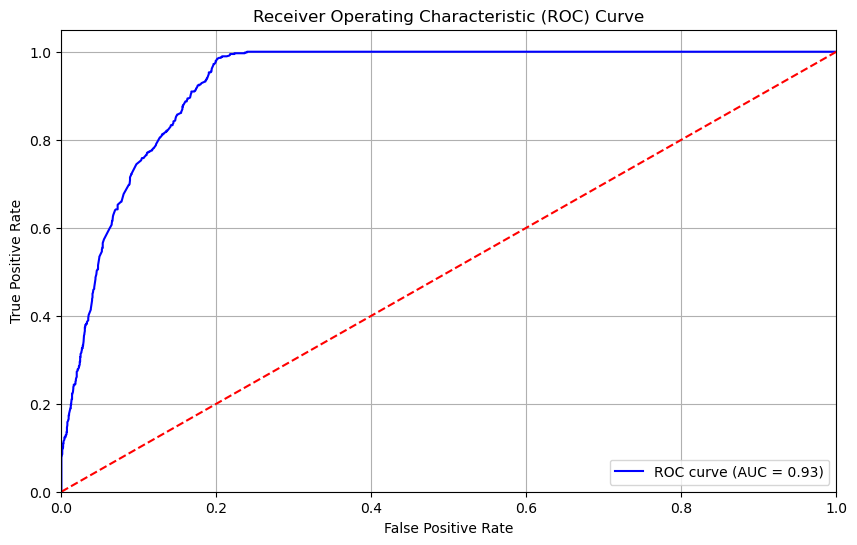

In [615]:


# Assuming y_train is a Pandas Series
y_train_numeric = y_train.map({'N': 0, 'Y': 1})

# Calculate the false positive rate and true positive rate
fpr1, tpr1, _ = roc_curve(y_true=y_train_numeric, y_score=model_log.decision_function(one_hot_encoded_df))

# Calculate the area under the curve
roc_auc = auc(fpr1, tpr1)

# Print the AUC
print(f"Area Under the Curve: {roc_auc:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

##### Conclusion for the train model output

* The train model that we got from our values was 93% accurate in making the predictions 

In [616]:
y_train = y_train.map({'Y': 1, 'N': 0})

y_hat_train = model_log.predict(one_hot_encoded_df)


y_hat_train = model_log.predict_proba(one_hot_encoded_df)[:, 1]  
y_hat_train_int = (y_hat_train > 0.5).astype(int)

train_residuals = np.abs(y_train - y_hat_train)

train_residuals



25528    3.141103e-07
2139     5.227955e-01
146      3.557800e-04
60635    2.215070e-06
4092     5.087544e-01
             ...     
10707    6.489528e-01
11044    2.149738e-01
12600    4.270034e-01
8542     5.113337e-01
61976    1.392944e-05
Name: Arrest Flag, Length: 2394, dtype: float64

#### 4.3 Modelling the Test data

We first one hot encode for our X test

In [617]:
hot_encoded_test = pd.get_dummies(X_test, columns=[ 'Stop Resolution', 'Subject Perceived Gender', 'Subject Perceived Race', 'Final Call Type', 'Frisk Flag', 'Precinct'], dtype = int)

hot_encoded_test.shape

(798, 98)

In [618]:

# Instantiate the logistic regression model
log_reg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
model_log2 = log_reg.fit(hot_encoded_test, y_test)

model_log2

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

Area Under the Curve: 0.94


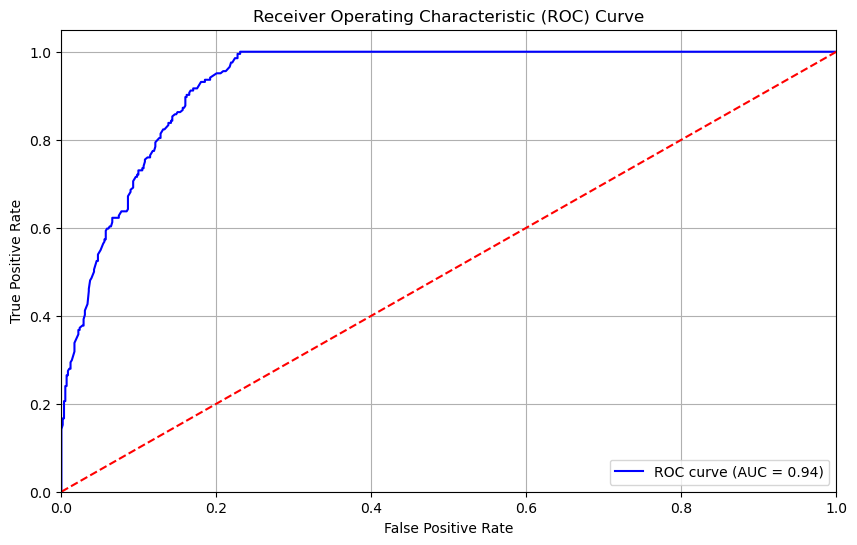

In [619]:
y_test_numeric = y_test.map({'N': 0, 'Y': 1})

# Calculate the false positive rate and true positive rate
fpr1, tpr1, _ = roc_curve(y_true=y_test_numeric, y_score=model_log2.decision_function(hot_encoded_test))

# Calculate the area under the curve
roc_auc = auc(fpr1, tpr1)

# Print the AUC
print(f"Area Under the Curve: {roc_auc:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(fpr1, tpr1, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### Conclusions for the test model output

* The test model was 94% accurate in making predictions according to our Area Under the Curve

#### 4.3.1 Conclusions for the models 

* With the numbers given from our train and test models 0.93 and 0.94 respectively establishes that our predictions are very accurate having a difference of only 0.01 

* Our model shows excellent performance with high AUC values for both training and testing. The slight difference suggests good generalization, but it’s always beneficial to look at additional metrics and the data distribution to ensure robust performance. 
* The fact that the test AUC (0.94) is slightly higher than the train AUC (0.93) suggests that your model may generalize well to unseen data. This is a positive sign, as it indicates that the model is not overfitting to the training data.
* The close proximity of the AUC values (0.94 vs. 0.93) indicates that the model's performance is consistent across both training and testing datasets. This consistency is crucial for ensuring that the model can reliably predict outcomes in real-world scenarios.
* Both the test AUC of 0.94 and the train AUC of 0.93 indicate that your model is performing very well. AUC values closer to 1.0 suggest excellent discrimination between the positive and negative classes.

## 4.4 Using Decision Trees

We are using Decision trees since are a valuable tool for modeling data due to their simplicity, interpretability, ability to handle various data types, and suitability for both individual use and ensemble methods

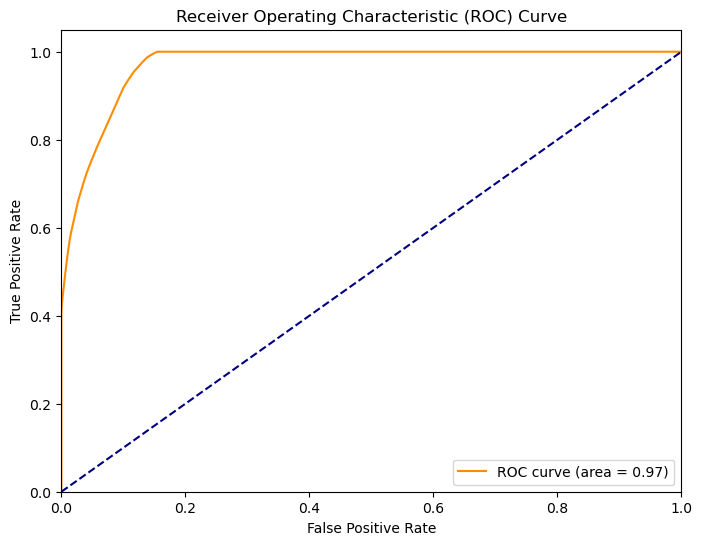

AUC: 0.9716


In [639]:
dt_model = DecisionTreeClassifier(random_state=42) 

dt_model.fit(one_hot_encoded_df, y_train)

y_pred_proba = dt_model.predict_proba(one_hot_encoded_df)[:, 1]

fpr, tpr, thresholds = roc_curve(y_train_numeric, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.4f}")

##### conclusion for the train AUC

an AUC of 0.9716 is a strong indicator of your decision tree model's effectiveness. It suggests that the model is well-suited for classification tasks, but further validation and analysis are recommended to ensure robustness and generalizability.

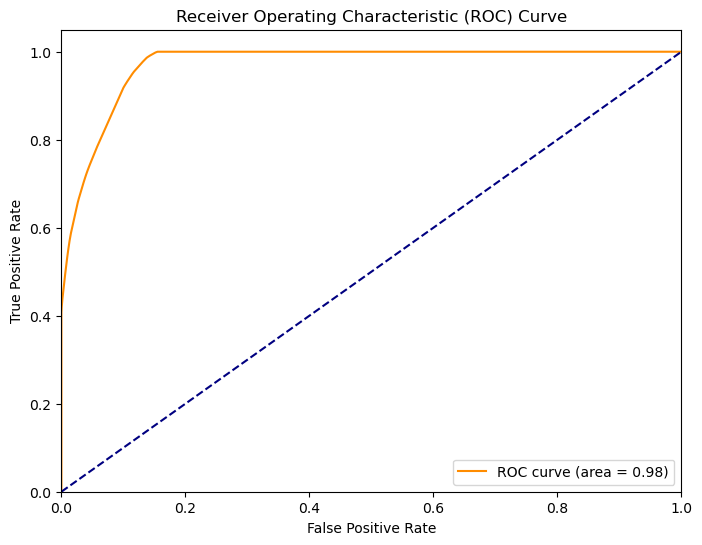

AUC: 0.9824


In [621]:
dt_model2 = DecisionTreeClassifier(random_state=42) 

dt_model2.fit(hot_encoded_test, y_test)

y_pred_probal = dt_model2.predict_proba(hot_encoded_test)[:, 1]

fpr3, tpr3, thresholds = roc_curve(y_test_numeric, y_pred_probal)

roc_auc = auc(fpr3, tpr3)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.4f}")

##### conclusion for the test AUC

The test AUC of 0.9824 is a remarkable achievement. It demonstrates the strength of your decision tree model and its ability to generalize well to new data.it indicates that we're on the right track to building a highly effective and reliable model for your application.

#### 4.4.1 Conclusions For the Decision trees

* The fact that the test AUC is slightly higher than the training AUC suggests that there's very little overfitting. This is a very positive sign, indicating that your model is not just memorizing the training data but actually learning the underlying patterns.
* The consistently high AUC scores across both training and test sets give us high confidence in the predictions our model makes. We can rely on its outputs for decision-making with a good degree of certainty.
* The combination of excellent model fit and strong generalization ability makes our model a strong candidate for more real-world applications. It's likely to perform well in scenarios where accurate predictions are crucial.

## 5.0 VALIDATING OUR DATA

By the use of precision and a confusion matrix we are able to validate our data

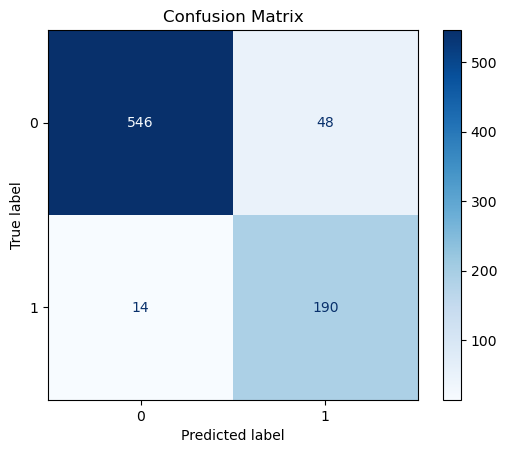

0.7983193277310925

In [638]:
threshold = 0.5
y_pred_binary = (y_pred_probal >= threshold).astype(int)

cm = confusion_matrix(y_test_numeric, y_pred_binary)

precision = precision_score(y_test_numeric, y_pred_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)  # Choose a color map
plt.title('Confusion Matrix')
plt.show()

precision



#### 5.1 Conclusions for our matrix and precision

* **True Positive** are the cases where the model correctly predicted class 1 (the positive class) when the actual class was also 1.
In our case the model correctly identified 190 samples as belonging to class 1.
* **True Negative** are the cases where the model correctly predicted class 0 (the negative class) when the actual class was also 0.
In our case the model correctly identified 546 samples as belonging to class 0.

The above shows a confusion matrix which shows us that the model is significantly better at predicting the 0 class than the 1 class. Evidence for this is:

High True Negatives (TN): 546 samples were correctly classified as class 0.
Lower True Positives (TP): Only 190 samples were correctly classified as class 1.
Class Imbalance: The model seems to overpredict class 0, suggesting a possible imbalance in the training data towards class 0.

# 6. CONCLUSION AND RECOMMENDATIONS 

### 6.1 Conclusion
**Strengths:**
High Accuracy: Your model demonstrates excellent performance with high AUC scores for both training and testing, indicating its ability to distinguish between arrest and no-arrest scenarios.
Good Generalization: The slightly higher test AUC compared to the training AUC suggests that your model generalizes well to new data, meaning it's not just memorizing the training set.
Consistent Performance: The similar AUC scores across training and testing datasets indicate reliable performance, suggesting your model will perform well in real-world scenarios.

**Weaknesses:**
Class Imbalance: The model exhibits a bias towards predicting "no arrest" due to an imbalance in the training data, with far more examples of Terry Stops that did not result in arrests.

**Consequences of Imbalance:**
False Negatives: The model might miss situations where an arrest is actually likely, potentially leading to unsafe situations.
Perceived Bias: The model might over-predict "no arrest" in situations where an arrest is less likely, potentially contributing to a perception of racial bias.

**Addressing the Weakness:**
Data Augmentation: Generate synthetic data to increase the number of "arrest" examples in your training data.
Oversampling/Undersampling: Adjust the class distribution by replicating "arrest" examples or removing some "no arrest" examples.
Class Weights: Assign different weights to each class during training to prioritize "arrest" predictions.

**Overall:**
By addressing the class imbalance, you can improve your model's accuracy and fairness, ultimately achieving your project goals of promoting transparency, reducing unnecessary arrests, and informing policy and training.



### 6.2 Recommendations
**Address Class Imbalance:**
Data Augmentation: Increase the number of examples for class 1 in the training data by using techniques like data augmentation (e.g., creating synthetic data similar to existing class 1 samples).
Oversampling/Undersampling: Adjust the class distribution by oversampling class 1 examples (replicating them) or undersampling class 0 examples (removing some).
Class Weights: Assign different weights to each class during training to give more importance to class 1.

**Evaluate Other Metrics:**
Precision, Recall, F1-Score: These metrics provide a more nuanced view of the model's performance, especially in the context of class imbalance.
ROC Curve: Visualize the model's performance across different thresholds to understand its ability to discriminate between classes.

**Consider Business Objectives:**
Cost of False Positives vs. False Negatives: Determine which type of error is more costly for your specific business problem. This can help you prioritize improving precision or recall.
Target Audience: Understand the needs of your target audience and how the model's predictions will be used. This can guide your efforts to improve the model's performance on specific aspects.